# 1 (a)

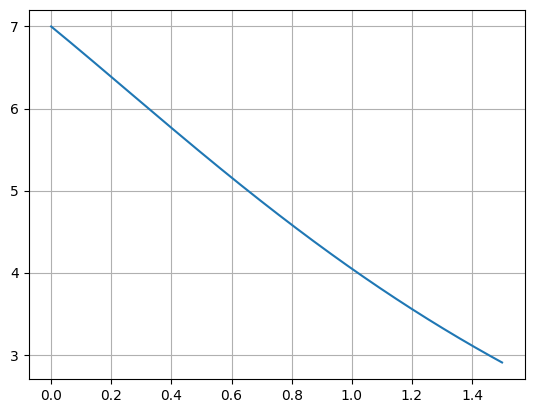

In [1]:
#Question 1 (a)
import numpy as np
from matplotlib.pyplot import *

f = lambda x,y,dy,ddy : y+dy-ddy

a=0
b=1.5
n = 1001
h = (b-a)/(n-1)
x = np.linspace(a,b,n)

y=x*0
dy=y*0
ddy=dy*0

y[0]=7
dy[0]=-3
ddy[0]=-1

for i in range(1,n):
  ddy[i]=ddy[i-1]+h*f(x[i-1],y[i-1],dy[i-1],ddy[i-1])
  dy[i]=dy[i-1]+h*ddy[i]
  y[i]=y[i-1]+h*dy[i]

plot(x,y)
grid()
show()

# 1(b)

In [2]:
from sympy import symbols, Function, dsolve

x = symbols('x')
y = Function('y')(x)

diff_eq_sympy = y.diff(x, 3) + y.diff(x, 2) - y.diff(x) - y

solution = dsolve(diff_eq_sympy, y, ics={y.subs(x, 0): 7, y.diff(x).subs(x, 0): -3, y.diff(x, 2).subs(x, 0): -1})

y_value_at_1_5 = solution.subs(x, 1.5).rhs.evalf()

print("Value of y at x = 1.5:", round(y_value_at_1_5, 2))

Value of y at x = 1.5: 2.90


# 2(a)

2*x**3 - 5*x**2 + 2*x + 1

The maximum value  at 5/6 - sqrt(13)/6 is,


-sqrt(13)/3 - 5*(5/6 - sqrt(13)/6)**2 + 2*(5/6 - sqrt(13)/6)**3 + 8/3

The minimum value at sqrt(13)/6 + 5/6 is,


-5*(sqrt(13)/6 + 5/6)**2 + sqrt(13)/3 + 8/3 + 2*(sqrt(13)/6 + 5/6)**3

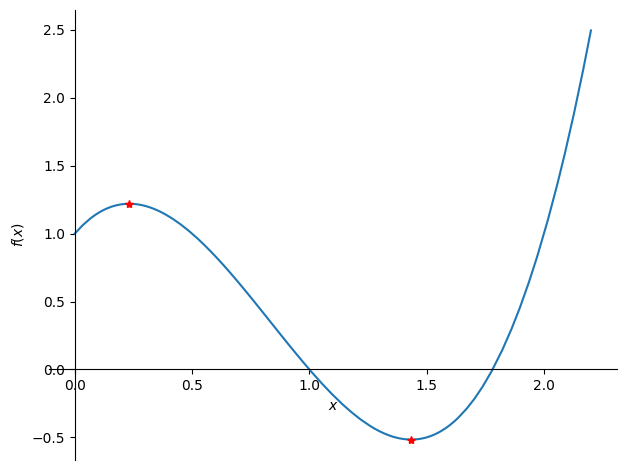

In [22]:

import sympy as sp

x=sp.symbols("x")

eq = (2*x**3 -5*x**2 +2*x +1)

display(eq)


dx = sp.diff(eq,x)
ddx = sp.diff(eq,x,2)
d2 = sp.Eq(ddx,0)


soln=list(sp.solveset(dx,x,sp.Interval(-5,5)))
x_pt=[]
for i in range(len(soln)):
  if sp.im(soln[i])==0 and ddx.subs(x,soln[i])>0:
    x_pt.append(soln[i])
    min_val=eq.subs(x,soln[i])
    print(f'The minimum value at {soln[i]} is,')
    display(min_val)
  elif sp.im(soln[i])==0 and ddx.subs(x,soln[i])<0:
    x_pt.append(soln[i])
    max_val=eq.subs(x,soln[i])
    print(f'The maximum value  at {soln[i]} is,')
    display(max_val)
  else:
    continue


marker=[]
for i in range(len(x_pt)):
  X=x_pt[i]
  Y=eq.subs(x,x_pt[i])
  marker.append({'args':[X,Y,'r*']})
sp.plot(eq,(x,0,2.2),markers=marker)

show()

# 2(b)

sin(2*x) + cos(3*x)

[]


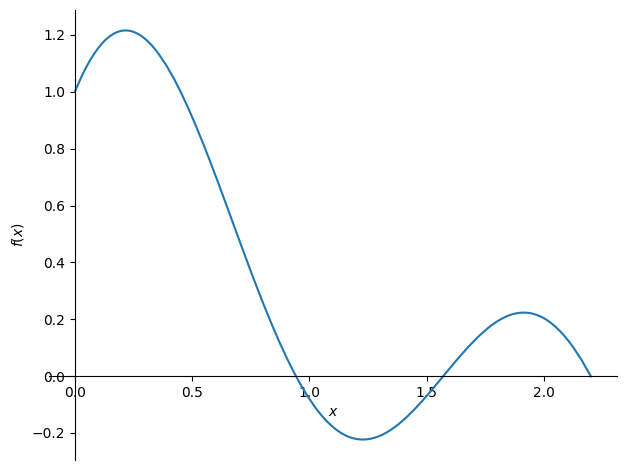

In [21]:

import sympy as sp
import numpy as np
x=sp.symbols("x")
eq = sp.sin(2*x) + sp.cos(3*x)
display(eq)
dx = sp.diff(eq,x)
ddx = sp.diff(eq,x,2)

soln = sp.solve(dx,x)
print(soln)
x_pt=[]
for i in range(len(soln)):
  if sp.im(soln[i])==0 and ddx.subs(x,soln[i])>0:
    x_pt.append(soln[i])
    min_val=eq.subs(x,soln[i])
    print(f'The minimum value at {soln[i]} is,')
    display(min_val)
  elif sp.im(soln[i])==0 and ddx.subs(x,soln[i])<0:
    x_pt.append(soln[i])
    max_val=eq.subs(x,soln[i])
    print(f'The maximum value at {soln[i]} is,')
    display(max_val)
  else:
    continue
marker=[]
for i in range(len(x_pt)):
  X=x_pt[i]
  Y=eq.subs(x,x_pt[i])
  marker.append({'args':[X,Y,'r*']})
sp.plot(eq,(x,0,2.2),markers=marker)
show()

# 3(a)

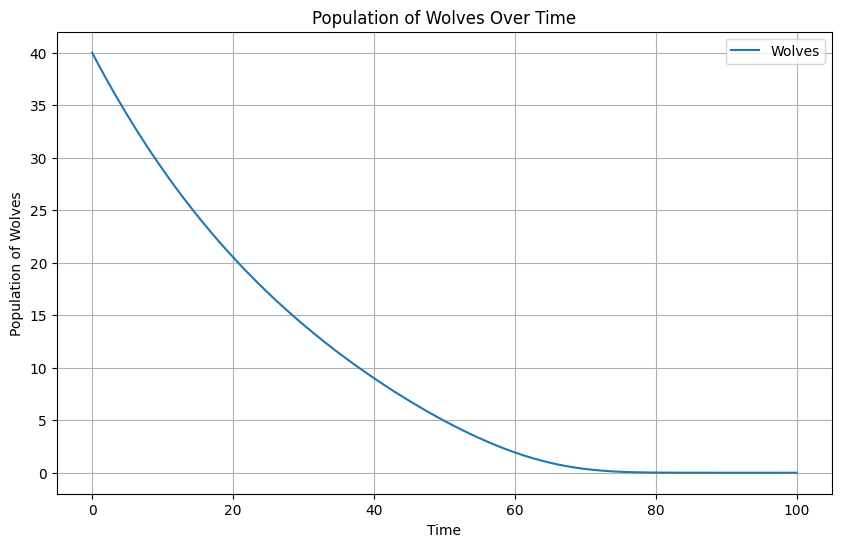

In [26]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def system(y, t):
    R, W = y
    dR_dt = R * (0.08 - 0.001 * W)
    dW_dt = W * (-0.03 - 0.00002 * R)
    return [dR_dt, dW_dt]

R_0 = 100
W_0 = 40
initial_conditions = [R_0, W_0]

time_array = np.linspace(0, 100, 500)

solution = odeint(system, initial_conditions, time_array)

R_values, W_values = solution.T

# Plotting W vs t
plt.figure(figsize=(10, 6))
plt.plot(time_array, W_values, label='Wolves')
plt.title('Population of Wolves Over Time')
plt.xlabel('Time')
plt.ylabel('Population of Wolves')
plt.grid(True)
plt.legend()
plt.show()

# 3(b)

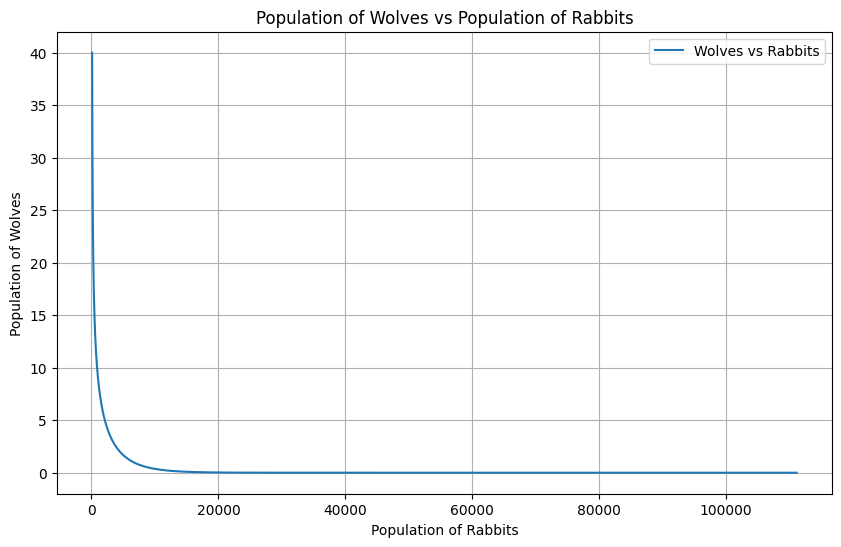

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(R_values, W_values, label='Wolves vs Rabbits')
plt.title('Population of Wolves vs Population of Rabbits')
plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')
plt.grid(True)
plt.legend()
plt.show()